In [23]:
# Import NumPy for numerical operations
import numpy as np
# Import pandas for data handling and analysis
import pandas as pd
# Import matplotlib for data visualization
import matplotlib.pyplot as plt
# Import seaborn for statistical data visualization
import seaborn as sns
# Ensure plots are displayed within the Jupyter notebook
%matplotlib inline

In [25]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv("cleaned_hr_data.csv")

# Display the entire DataFrame in Jupyter to get an overview of the data
df

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobLevel,...,EmployeeRevenue,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Age<=25,Age>=55,ROI
0,41,Yes,Sales,1,Undergraduate,Life Sciences,1,Neutral,Female,Junior,...,19479,11,3,40,0,1,6,False,False,225.029201
1,49,No,Research & Development,8,High School,Life Sciences,2,Satisfied,Male,Junior,...,24907,23,4,40,3,3,10,False,False,385.516569
2,37,Yes,Research & Development,2,Undergraduate,Other,4,Very Satisfied,Male,Entry-level,...,2396,15,3,40,3,3,0,False,False,14.641148
3,33,No,Research & Development,3,Professional Certification,Life Sciences,5,Very Satisfied,Female,Entry-level,...,23159,11,3,40,3,3,8,False,False,696.115504
4,27,No,Research & Development,2,High School,Medical,7,Dissatisfied,Male,Entry-level,...,16632,12,3,40,3,3,2,False,False,379.584775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,Undergraduate,Medical,2061,Satisfied,Male,Junior,...,12290,17,3,40,3,3,5,False,False,378.024115
1466,39,No,Research & Development,6,High School,Medical,2062,Very Satisfied,Male,Mid-level,...,21457,15,3,40,5,3,7,False,False,114.763287
1467,27,No,Research & Development,4,Postgraduate,Life Sciences,2064,Neutral,Male,Junior,...,5174,20,4,40,0,3,6,False,False,-15.760339
1468,49,No,Sales,2,Postgraduate,Medical,2065,Very Satisfied,Male,Junior,...,13243,14,3,40,3,2,9,False,False,145.695733


## Number of employees by gender

In [28]:
# Count the number of occurrences of each gender in the dataset
gender_counts = df["Gender"].value_counts()

# Display the gender counts
gender_counts

Gender
Male      882
Female    588
Name: count, dtype: int64

In [30]:
# Show the labels of the gender_counts Series (e.g., 'Male', 'Female')
gender_counts.index

Index(['Male', 'Female'], dtype='object', name='Gender')

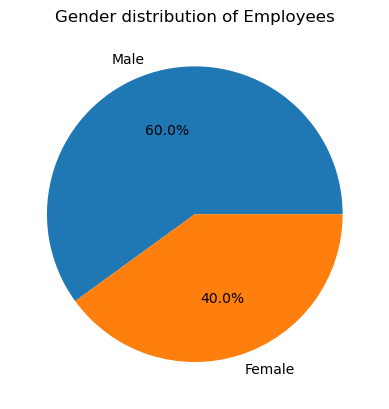

In [34]:
# Create a pie chart showing gender distribution
plt.pie(
    gender_counts,               # Values to plot
    labels=gender_counts.index, # Labels for the slices
    autopct='%1.1f%%'            # Show percentages with 1 decimal place
)

# Add a title to the pie chart
plt.title("Gender distribution of Employees")

# Display the plot
plt.show()


## Attrition by marital status

In [37]:
# Create a pivot table to count how many employees (EmployeeNumber)
# are in each MaritalStatus group, split by Attrition status (Yes/No)
pivot_table = pd.pivot_table(
    df,
    index='Attrition',          # Rows: Attrition values ('Yes', 'No')
    columns='MaritalStatus',    # Columns: Marital status categories ('Single', 'Married', etc.)
    values='EmployeeNumber',    # What to count: the 'EmployeeNumber' field (used just to count entries)
    aggfunc='count'             # Aggregation: count how many in each combination
)

# Show the resulting pivot table
pivot_table

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


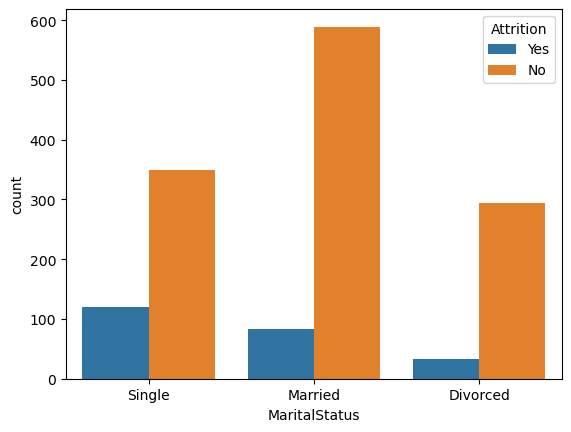

In [39]:
# Create a bar chart showing the number of employees by Marital Status,
# with different colors for those who left (Attrition = Yes) vs stayed (Attrition = No)
sns.countplot(
    data=df,
    x='MaritalStatus',     # X-axis: categories of marital status
    hue='Attrition'        # Bar color split: 'Yes' or 'No' attrition
)

# Display the plot
plt.show()

## Revenue and salary by education level

In [44]:
# Create a pivot table to calculate the average salary and revenue
# for each level of education
pivot_table = pd.pivot_table(
    df,
    index='Education',                             # Rows: different education levels
    values=['EmployeeSalary', 'EmployeeRevenue'],  # What to average: salary and revenue
    aggfunc='mean'                                 # Aggregation: calculate the mean
)

# Show the resulting pivot table
pivot_table

,EmployeeRevenue,EmployeeSalary
Education,,
High School,15208.100000,5640.570588
Other,14516.687500,8277.645833
Postgraduate,14082.809441,6517.263986
Professional Certification,14281.989950,6832.402010
Undergraduate,14249.946809,6226.645390


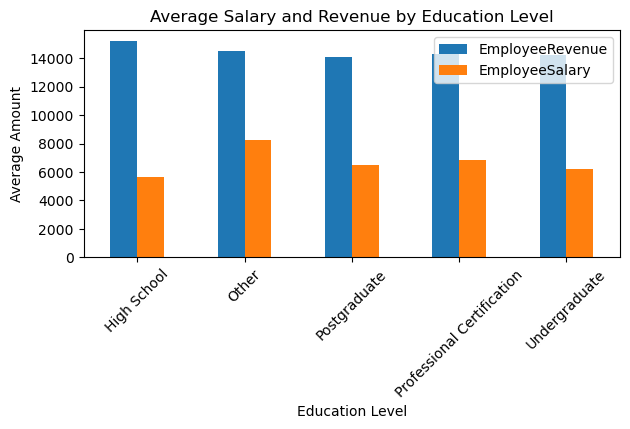

In [46]:
# Bar plot for Average Salary and Revenue by Education Level
# (based on the pivot_table created earlier)

# Create a grouped bar chart from the pivot table
pivot_table.plot(kind='bar')

# Set the title of the chart
plt.title("Average Salary and Revenue by Education Level")

# Label the x-axis
plt.xlabel("Education Level")

# Label the y-axis
plt.ylabel("Average Amount")

# Adjust layout to make sure labels and titles fit well
plt.tight_layout()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

## Employees aged >= 55 by job role

In [49]:
# Create a pivot table to count how many employees aged 55 or older (True)
# and younger than 55 (False) are in each Job Role
pivot_table = pd.pivot_table(
    df,
    index='JobRole',           # Rows: different job roles
    columns='Age>=55',         # Columns: whether the employee is 55 or older (True/False)
    values='Age',              # Use the 'Age' column just to count rows
    aggfunc='count',           # Count number of occurrences
    fill_value=0               # Fill missing values with 0
)

# Show the resulting pivot table
pivot_table

Age>=55,False,True
JobRole,,
Healthcare Representative,120,11
Human Resources,51,1
Laboratory Technician,254,5
Manager,85,17
Manufacturing Director,139,6
Research Director,74,6
Research Scientist,281,11
Sales Executive,314,12
Sales Representative,83,0


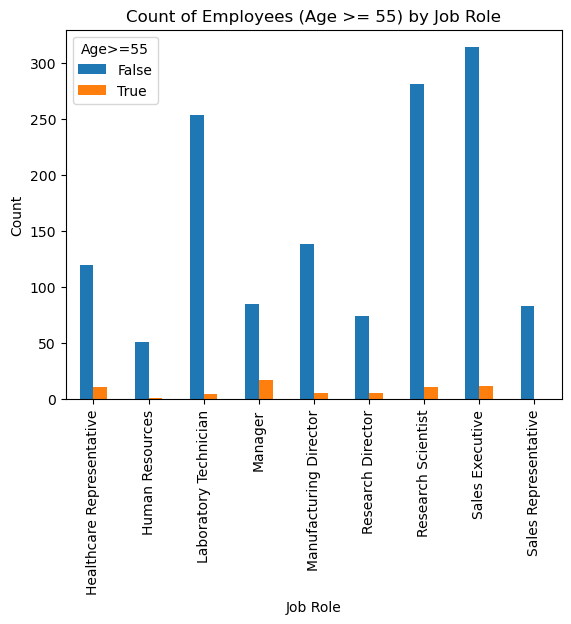

In [51]:
# Create a bar chart from the pivot table showing how many employees aged 55 or older
# (and those younger than 55) are in each Job Role

pivot_table.plot(kind='bar')  # Plot a grouped bar chart

# Set the title of the chart
plt.title("Count of Employees (Age >= 55) by Job Role")

# Label the x-axis
plt.xlabel("Job Role")

# Label the y-axis
plt.ylabel("Count")

# Rotate x-axis labels so job role names are readable
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Salary vs Revenue of Employees by Job Role

In [54]:
pivot_table = pd.pivot_table(df, index='JobRole', values=['EmployeeSalary','EmployeeRevenue'], aggfunc='mean')
pivot_table

,EmployeeRevenue,EmployeeSalary
JobRole,,
Healthcare Representative,14400.198473,7528.763359
Human Resources,13292.403846,4235.750000
Laboratory Technician,14066.061776,3237.169884
Manager,15139.578431,17181.676471
Manufacturing Director,14478.965517,7295.137931
Research Director,15080.550000,16033.550000
Research Scientist,13927.113014,3239.972603
Sales Executive,14471.110429,6924.279141
Sales Representative,14278.204819,2626.000000


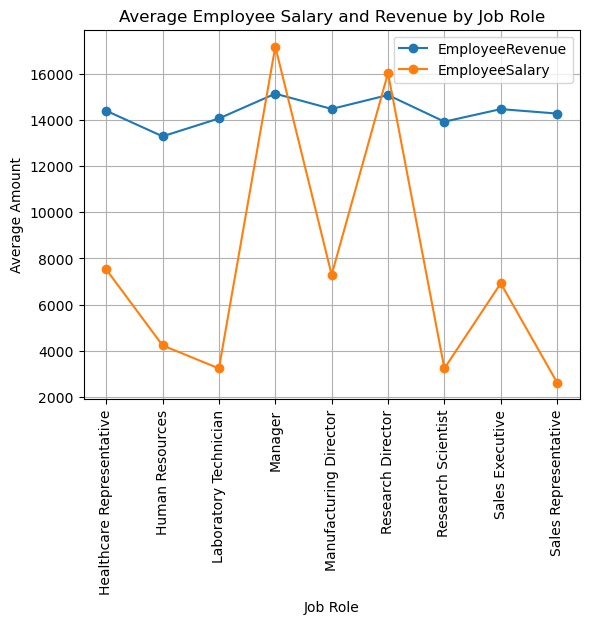

In [58]:
# Plotting the pivot table as a line chart with circular markers
pivot_table.plot(kind='line', marker='o')

# Setting the title of the chart
plt.title("Average Employee Salary and Revenue by Job Role")

# Labeling the x-axis as Job Role
plt.xlabel("Job Role")

# Labeling the y-axis to indicate average values (salary and revenue)
plt.ylabel("Average Amount")

# Rotating x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Displaying the legend in the upper right corner of the plot
plt.legend(loc="upper right")

# Enabling grid lines to improve readability of the chart
plt.grid(True)

# Displaying the final plot
plt.show()

## Correlation Heatmap

In [61]:
# Selecting all numeric columns from the DataFrame by excluding columns with data type 'object' (typically strings)
numeric_columns = df.select_dtypes(exclude='object')

In [63]:
numeric_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1470 non-null   int64  
 1   DistanceFromHome       1470 non-null   int64  
 2   EmployeeNumber         1470 non-null   int64  
 3   EmployeeSalary         1470 non-null   int64  
 4   EmployeeRevenue        1470 non-null   int64  
 5   PercentSalaryHike      1470 non-null   int64  
 6   PerformanceRating      1470 non-null   int64  
 7   StandardHours          1470 non-null   int64  
 8   TrainingTimesLastYear  1470 non-null   int64  
 9   WorkLifeBalance        1470 non-null   int64  
 10  YearsAtCompany         1470 non-null   int64  
 11  Age<=25                1470 non-null   bool   
 12  Age>=55                1470 non-null   bool   
 13  ROI                    1470 non-null   float64
dtypes: bool(2), float64(1), int64(11)
memory usage: 140.8 KB

In [67]:
# Calculating the correlation matrix for all numeric columns to understand relationships between variables
correlation_matrix = numeric_columns.corr()

# Displaying the resulting correlation matrix
correlation_matrix

,Age,DistanceFromHome,EmployeeNumber,EmployeeSalary,EmployeeRevenue,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Age<=25,Age>=55,ROI
Age,1.000000,-0.001686,-0.010145,0.497855,0.028051,0.003634,0.001904,NaN,-0.019621,-0.021490,0.311309,-0.480370,0.484705,-0.324369
DistanceFromHome,-0.001686,1.000000,0.032916,-0.017014,0.027473,0.040235,0.027110,NaN,-0.036942,-0.026556,0.009508,0.002825,-0.002097,0.005558
EmployeeNumber,-0.010145,0.032916,1.000000,-0.014829,0.012648,-0.012944,-0.020359,NaN,0.023603,0.010309,-0.011240,-0.018160,-0.022776,-0.001285
EmployeeSalary,0.497855,-0.017014,-0.014829,1.000000,0.034814,-0.027269,-0.017120,NaN,-0.021736,0.030683,0.514285,-0.226654,0.187305,-0.551224
EmployeeRevenue,0.028051,0.027473,0.012648,0.034814,1.000000,-0.006429,-0.009811,NaN,0.001467,0.007963,-0.023655,0.027078,0.047699,0.556269
PercentSalaryHike,0.003634,0.040235,-0.012944,-0.027269,-0.006429,1.000000,0.773550,NaN,-0.005221,-0.003280,-0.035991,0.004854,0.018059,0.011884
PerformanceRating,0.001904,0.027110,-0.020359,-0.017120,-0.009811,0.773550,1.000000,NaN,-0.015579,0.002572,0.003435,0.000612,0.021328,0.006532
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TrainingTimesLastYear,-0.019621,-0.036942,0.023603,-0.021736,0.001467,-0.005221,-0.015579,NaN,1.000000,0.028072,0.003569,0.026084,-0.030328,0.045275
WorkLifeBalance,-0.021490,-0.026556,0.010309,0.030683,0.007963,-0.003280,0.002572,NaN,0.028072,1.000000,0.012089,0.036072,-0.025159,-0.020877


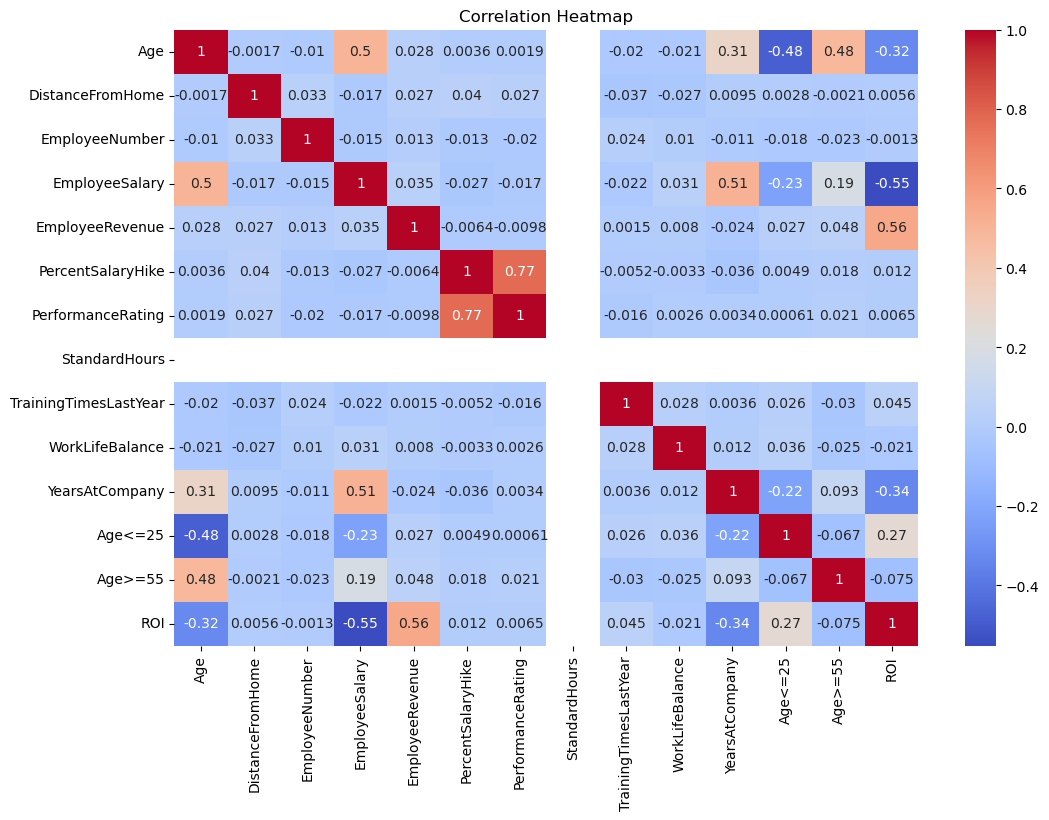

In [76]:
# Setting the size of the figure to 12 inches wide by 8 inches tall
plt.figure(figsize=(12, 8))

# Creating a heatmap to visualize the correlation matrix
# 'annot=True' displays the correlation coefficients in each cell
# 'cmap="coolwarm"' sets the color scheme to highlight positive and negative correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Adding a title to the heatmap
plt.title("Correlation Heatmap")

# Displaying the heatmap
plt.show()

## Employee Revenue by Job Satisfaction

<Figure size 1000x600 with 0 Axes>

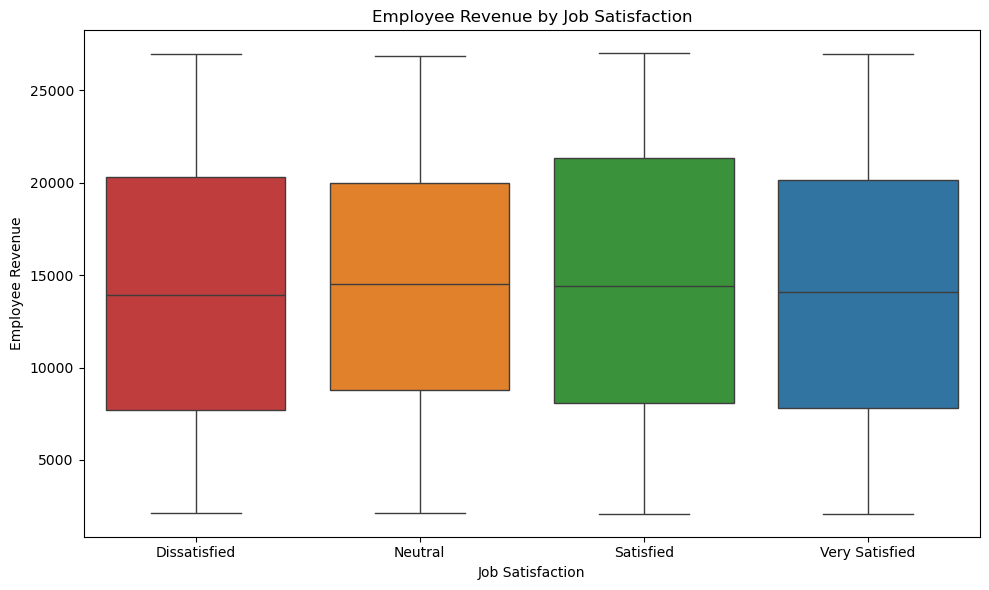

In [93]:
# Setting the size of the plot to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# Defining a specific order for the job satisfaction categories
categories_order = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied']

# Creating a boxplot to show the distribution of employee revenue for each job satisfaction category
# 'hue' is also set to 'JobSatisfaction' to color the boxes by category
# 'order' ensures the categories appear in a meaningful, predefined order
sns.boxplot(data=df, x='JobSatisfaction', y='EmployeeRevenue', hue='JobSatisfaction', order=categories_order)

# Setting the title of the plot
plt.title("Employee Revenue by Job Satisfaction")

# Labeling the x-axis
plt.xlabel("Job Satisfaction")

# Labeling the y-axis
plt.ylabel("Employee Revenue")

# Adjusting layout to prevent clipping of labels
plt.tight_layout()

# Displaying the boxplot
plt.show()

In [95]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
Very Satisfied    459
Satisfied         442
Dissatisfied      289
Neutral           280
Name: count, dtype: int64

## Average ROI by Education Field

In [100]:
avg_roi_by_education = df.groupby('EducationField')['ROI'].mean().reset_index()
avg_roi_by_education

,EducationField,ROI
0,Human Resources,273.489126
1,Life Sciences,247.288461
2,Marketing,155.003795
3,Medical,241.521253
4,Other,203.454935
5,Technical Degree,257.135240


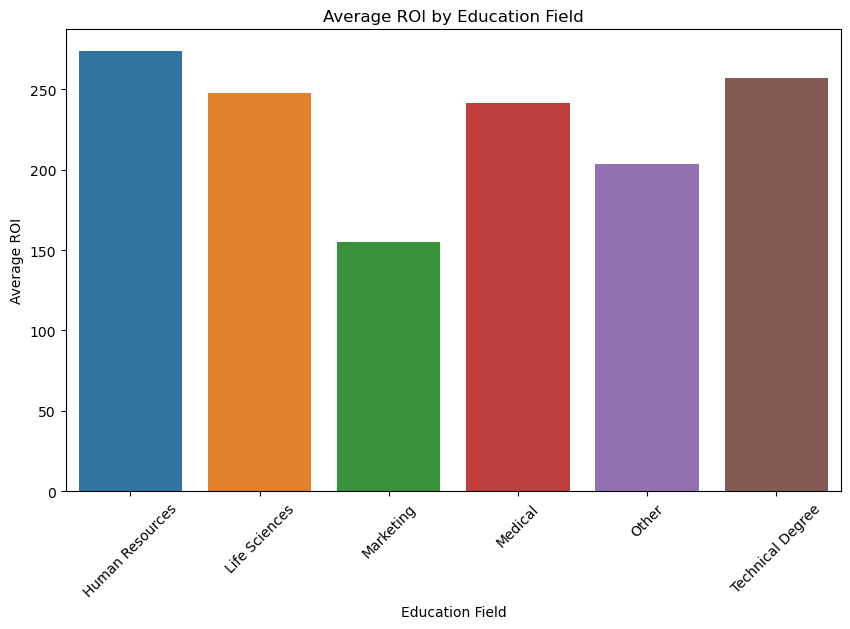

In [104]:
# Setting the figure size to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a bar plot to show the average ROI by education field
# 'hue' set to 'EducationField' colors bars differently for each category
sns.barplot(data=avg_roi_by_education, x='EducationField', y='ROI', hue='EducationField')

# Adding a title to the plot
plt.title("Average ROI by Education Field")

# Labeling the x-axis
plt.xlabel('Education Field')

# Labeling the y-axis
plt.ylabel("Average ROI")

# Rotating x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the bar plot
plt.show()

## Distance from Home

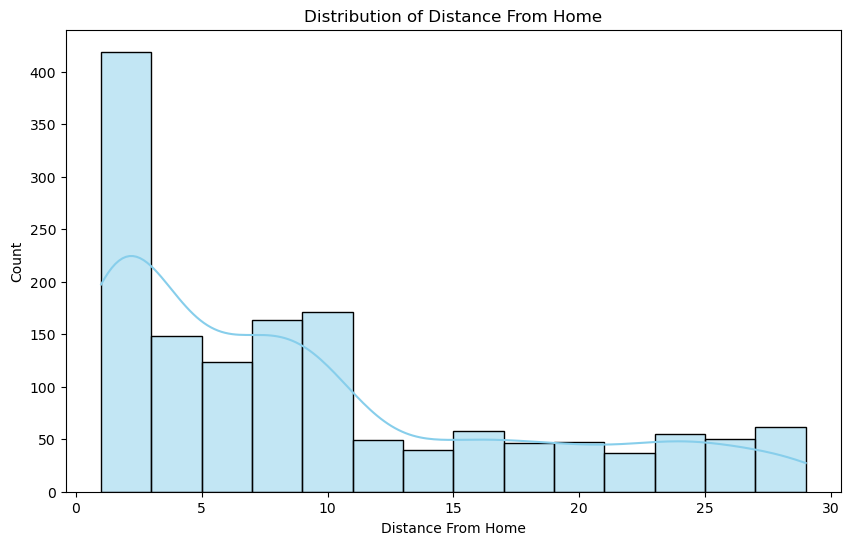

In [113]:
# Setting the figure size to 10 inches wide by 6 inches tall
plt.figure(figsize=(10, 6))

# Creating a histogram to visualize the distribution of the 'DistanceFromHome' variable
# 'color' sets the fill color of the bars, 'edgecolor' outlines the bars, and 'kde=True' adds a kernel density estimate curve
sns.histplot(data=df, x='DistanceFromHome', color='skyblue', edgecolor='black', kde=True)

# Adding a title to the plot
plt.title("Distribution of Distance From Home")

# Labeling the x-axis
plt.xlabel("Distance From Home")

# Displaying the histogram
plt.show()